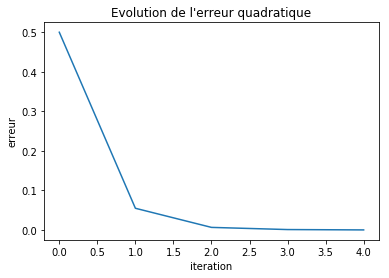

In [1]:
%matplotlib inline
# Réseau Minus, propagation avant avec stockage des activations et rétropropagation
import numpy as np
import matplotlib.pyplot as plt

liste_nc =[2,2,2]
nombre_couches = len(liste_nc)
# NB w[c] correspond a la couche c+1
w=np.array([[[0.2,0.7],[0.5,0.1],[0.3,-0.3]],[[-0.2,0.5],[0.7,-0.1],[0,0.2]]])
taux = 0.1
nb_iterations = 5

liste_eq = []
x = [[1],[1]]
y = [[1],[0]]

for i in range(nb_iterations):
    # propagation_avant avec stockage des activations pour la rétropropagation
    activation = np.vstack((np.ones(1),x)) # activation de la couche 0
    activation_par_couche = [np.vstack((np.ones(1),x))] # liste des activations couche par couche
    # Itérer pour produire les activations de la couche 1 a la couche nombre_couches-1
    for c in range(nombre_couches-1): # NB c part a 0
        z = np.dot(w[c].transpose(),activation)
        activation = np.vstack((np.ones(1),z))
        activation_par_couche.append(activation)
    erreur_quadratique = sum((activation[1:]-y)**2)
    liste_eq.append(erreur_quadratique)

    # retropropagation
    dJ_dw = [np.zeros(une_matrice.shape) for une_matrice in w]
    dJ_da = 2*(activation_par_couche[nombre_couches-1][1:]-y) # Pour la couche de sortie
    dJ_dw[nombre_couches-2] = np.dot(activation_par_couche[nombre_couches-2],dJ_da.transpose())
    # itérer de la couche nombre_couches-2 à la couche 1
    for c in range(nombre_couches-2,0,-1):
        dJ_da = np.dot(w[c][1:], dJ_da) # dérivée pour a pour la couche c
        dJ_dw[c-1] = np.dot(activation_par_couche[c-1], dJ_da.transpose()) # dJ_dw[c-1] correspond a c
    w = [un_w-taux*dw  for (un_w, dw) in zip(w, dJ_dw)]
    
# Affichage du graphique d'évolution de l'erreur quadratique
plt.plot(np.arange(0,nb_iterations),liste_eq)
plt.title("Evolution de l'erreur quadratique")
plt.xlabel('iteration')
plt.ylabel('erreur')
plt.legend(loc='upper center')
plt.show()